# Self Attention

The self-attention mechanism, also known as intra-attention or scaled dot-product attention, is a key component in transformer-based models. It allows the model to capture relationships between different words within the same sentence or sequence by assigning attention weights.

To explain the self-attention mechanism, let's consider the sample sentence "The cat sat on the mat." 

We'll use a simplified version of the self-attention mechanism using dot products.

   **Embedding**: First, each word in the sentence is transformed into a word embedding, which represents the word's meaning in a vector space.

   **Query, Key, and Value**: The word embeddings are used to generate three types of vectors: query, key, and value. These vectors are obtained by multiplying the word embeddings by learnable weights (often referred to as matrices) specific to each type. Each word embedding is transformed into query, key, and value vectors. These vectors allow the model to compare and relate different words in the sentence. 
   
   For example, the word "cat" will have query, key, and value vectors associated with it. 
    
   The query is a vector representation that encodes the information or context that we want to retrieve from the input sequence. (The word or token in the English sentence that we want to translate at a particular time step, such as "cat".)
    
   The key vector represents the elements or features of the input sequence that we want to attend to or retrieve information from.(The representations or embeddings of the words in the input English sentence, for example, "I", "have", "a", "cat".)

   The value vector represents the information or content associated with each element in the input sequence. (The corresponding representations or embeddings of the words in the input English sentence, such as the word embeddings of "I", "have", "a", "cat".)
    
   The key vectors capture the relationships and importance of different elements, while the value vectors hold the actual information or content associated with those elements. The attention mechanism utilizes the key and value vectors together to compute attention weights and generate the context vector.    

   **Similarity Calculation**: To compute the attention weights, we calculate the similarity between each query vector and all key vectors. This can be done by taking the dot product between the query and key vectors and scaling the result by the square root of the dimension of the key vectors.

   **Attention Weights** : The similarity scores are further processed using the softmax function to obtain attention weights. The softmax ensures that the attention weights sum up to 1 and represent the importance or relevance of each word in the sentence.

   **Context Vector**: The attention weights are used to weigh the value vectors. The value vectors hold the information that the model will focus on for each word. The weighted sum of the value vectors, using the attention weights as coefficients, produces the context vector, which captures the relevant information from the entire sentence.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
import matplotlib.pyplot as plt

In [2]:
def plot_attention(attention_weights, query_labels=None, key_labels=None, batch_index=0):
    # Check if the attention_weights is 3D and select one matrix to plot
    if attention_weights.ndim == 3:
        attention_matrix = attention_weights[batch_index]
    else:
        attention_matrix = attention_weights  # Assume it's already 2D

    plt.figure(figsize=(10, 8))
    plt.imshow(attention_matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f'Attention Weights Matrix (Batch {batch_index+1})')
    plt.xlabel('Key Positions')
    plt.ylabel('Query Positions')
    
    # Set the ticks and labels
    if query_labels:
        plt.xticks(np.arange(len(key_labels)), labels=key_labels, rotation=45, ha="right")
        plt.yticks(np.arange(len(query_labels)), labels=query_labels)
        
    plt.show()

In [3]:
def self_attention(sentence, W_query, W_key, W_value):
    # Compute query, key, and value vectors
    queries = np.dot(sentence, W_query)
    keys = np.dot(sentence, W_key)
    values = np.dot(sentence, W_value)
    
    # Compute similarity scores using dot product and scaling
    scores = np.dot(queries, keys.T) / np.sqrt(keys.shape[-1])
    
    # Compute attention weights using softmax
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
    
    # Compute context vector using attention weights and values
    context_vector = np.dot(attention_weights, values)
    
    return context_vector, attention_weights

In [4]:
# Sample sentence
sentence = np.array([[0.2, 0.3, -0.1],
                     [0.5, -0.2, 0.4],
                     [-0.3, 0.1, 0.6],
                     [0.4, 0.5, -0.3]])

# Learnable weight matrices
W_query = np.random.randn(sentence.shape[1], sentence.shape[1])
W_key = np.random.randn(sentence.shape[1], sentence.shape[1])
W_value = np.random.randn(sentence.shape[1], sentence.shape[1])

# Apply self-attention mechanism
context_vector, attention_weights = self_attention(sentence, W_query, W_key, W_value)

# Print results
print("Sentence:")
print(sentence)
print("\nContext Vector:")
print(context_vector)
print("\nAttention Weights:")
print(attention_weights)

Sentence:
[[ 0.2  0.3 -0.1]
 [ 0.5 -0.2  0.4]
 [-0.3  0.1  0.6]
 [ 0.4  0.5 -0.3]]

Context Vector:
[[ 0.32738188 -0.06934894 -0.09154117]
 [ 0.3052434  -0.0023934  -0.2464467 ]
 [ 0.26579865  0.06587189 -0.40733716]
 [ 0.35716621 -0.13103565  0.05198835]]

Attention Weights:
[[0.2033266  0.31241918 0.31597823 0.16827599]
 [0.24202073 0.24355899 0.29467273 0.21974755]
 [0.2755921  0.19898631 0.23096566 0.29445593]
 [0.16210999 0.36357953 0.35879373 0.11551675]]


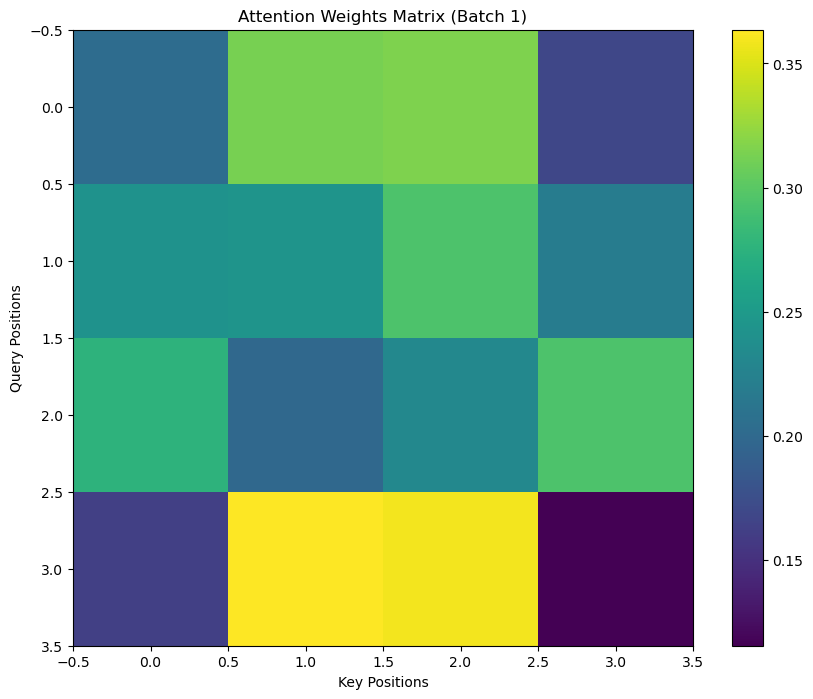

In [5]:
# Call the function to plot the attention weights
plot_attention(attention_weights)

## Self Attention Keras 

We will use Keras Embedding layer to generate word embeddings. 

We first tokenize the sentence and convert it to sequences of word indices using the tokenizer. Then, we create an embedding layer with the specified input dimension (vocab_size) and output dimension (embedding_dim).

We apply the embedding layer to the padded sequences, resulting in embedded sequences. These embedded sequences represent the word embeddings for the sentence.

Finally, we pass the embedded sequences to the self_attention function along with the learnable weight matrices to obtain the context vector and attention weights. The results are printed out for visualization.

In [6]:
def self_attention(sentence, W_query, W_key, W_value):
    # Compute query, key, and value vectors
    queries = tf.matmul(sentence, W_query)
    keys = tf.matmul(sentence, W_key)
    values = tf.matmul(sentence, W_value)
    
    # Compute similarity scores using dot product and scaling
    scores = tf.matmul(queries, keys, transpose_b=True) / tf.sqrt(tf.cast(keys.shape[-1], tf.float32))
    
    # Compute attention weights using softmax
    attention_weights = tf.nn.softmax(scores, axis=-1)
    
    # Compute context vector using attention weights and values
    context_vector = tf.matmul(attention_weights, values)
    
    return context_vector, attention_weights

In [7]:
# Sample English sentence
sentence = "The cat sat on the mat"

query_labels = sentence.lower().split()
key_labels = sentence.lower().split()

# Prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([sentence])

# Convert sentence to sequence of word indices
sequences = tokenizer.texts_to_sequences([sentence])
padded_sequences = pad_sequences(sequences, padding="post")

# Create word index and vocabulary size
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Define embedding dimension
embedding_dim = 100

# Create embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)

# Apply embedding layer to the padded sequences
embedded_sequences = embedding_layer(padded_sequences)

# Learnable weight matrices
W_query = np.random.randn(embedding_dim, embedding_dim)
W_key = np.random.randn(embedding_dim, embedding_dim)
W_value = np.random.randn(embedding_dim, embedding_dim)

# Apply self-attention mechanism
context_vector, attention_weights = self_attention(embedded_sequences, W_query, W_key, W_value)

# Print results
print("Sentence:")
print(sentence)
print("\nContext Vector:")
#print(context_vector)
print("\nAttention Weights:")
print(attention_weights)

Sentence:
The cat sat on the mat

Context Vector:

Attention Weights:
tf.Tensor(
[[[0.14504069 0.18078913 0.16608533 0.21287131 0.14504069 0.15017284]
  [0.17899452 0.17859595 0.19641672 0.13633035 0.17899452 0.13066785]
  [0.17310408 0.16930443 0.18689413 0.159135   0.17310408 0.13845827]
  [0.16976723 0.16951    0.17876479 0.14415061 0.16976723 0.16804007]
  [0.1450407  0.18078913 0.16608533 0.21287131 0.1450407  0.15017284]
  [0.1746126  0.13422687 0.16621044 0.16807412 0.1746126  0.1822634 ]]], shape=(1, 6, 6), dtype=float32)


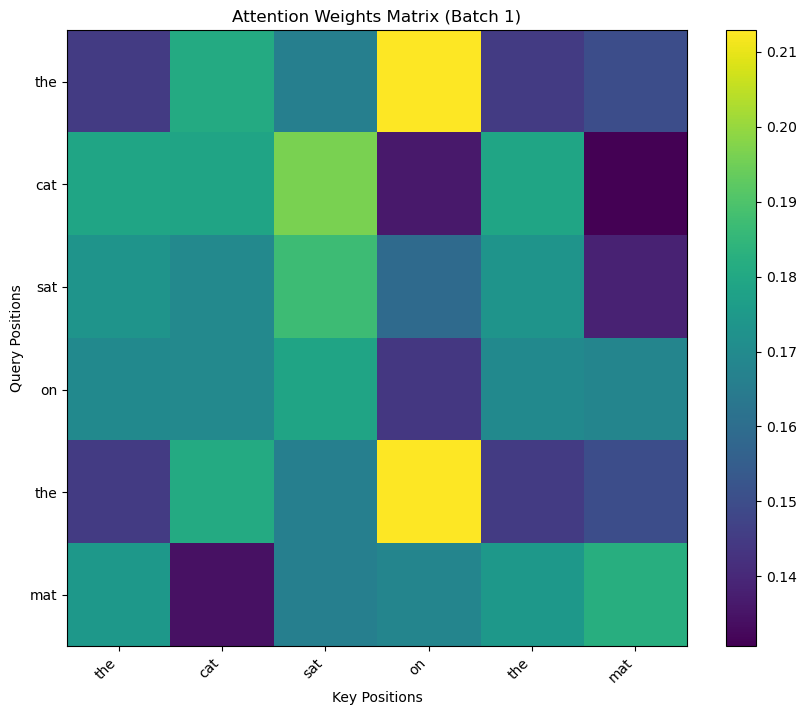

In [8]:
# Call the function to plot the attention weights
plot_attention(attention_weights, query_labels, key_labels)